In [1]:
import pandas as pd #importing Pandas library to enable the reading and manpularion of Data sets and csv files.
from sklearn.model_selection import train_test_split #this package allows us to split the data into testing and training features and targets.
import matplotlib.pyplot as plt #the matplotlib library gives us the ability to plot the dataset.
from sklearn.preprocessing import StandardScaler, LabelEncoder #To packages for scaling and fitting.

In [2]:
DataSet= pd.read_csv('DATASET.csv') #upload the dataset using the pandas library.
DataSet

,PassengerId,Pclass,Age,SibSp,Parch,Sex,Survived
0,1,3,22,1,0,male,0
1,2,1,38,1,0,female,1
2,3,3,26,0,0,female,1
3,4,1,35,1,0,female,1
4,5,3,35,0,0,male,0
...,...,...,...,...,...,...,...
144,145,2,18,0,0,male,0
145,146,2,19,1,1,male,0
146,147,3,27,0,0,male,1
147,148,3,9,2,2,female,0


In [5]:
#change the columns that uses strings to make them more fit for the model.
le= LabelEncoder()
DataSet['Sex'] = le.fit_transform(DataSet['Sex'])
DataSet

,PassengerId,Pclass,Age,SibSp,Parch,Sex,Survived
0,1,3,22,1,0,1,0
1,2,1,38,1,0,0,1
2,3,3,26,0,0,0,1
3,4,1,35,1,0,0,1
4,5,3,35,0,0,1,0
...,...,...,...,...,...,...,...
144,145,2,18,0,0,1,0
145,146,2,19,1,1,1,0
146,147,3,27,0,0,1,1
147,148,3,9,2,2,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  149 non-null    int64
 1   Pclass       149 non-null    int64
 2   Age          149 non-null    int64
 3   SibSp        149 non-null    int64
 4   Parch        149 non-null    int64
 5   Sex          149 non-null    int32
 6   Survived     149 non-null    int64
dtypes: int32(1), int64(6)
memory usage: 7.7 KB


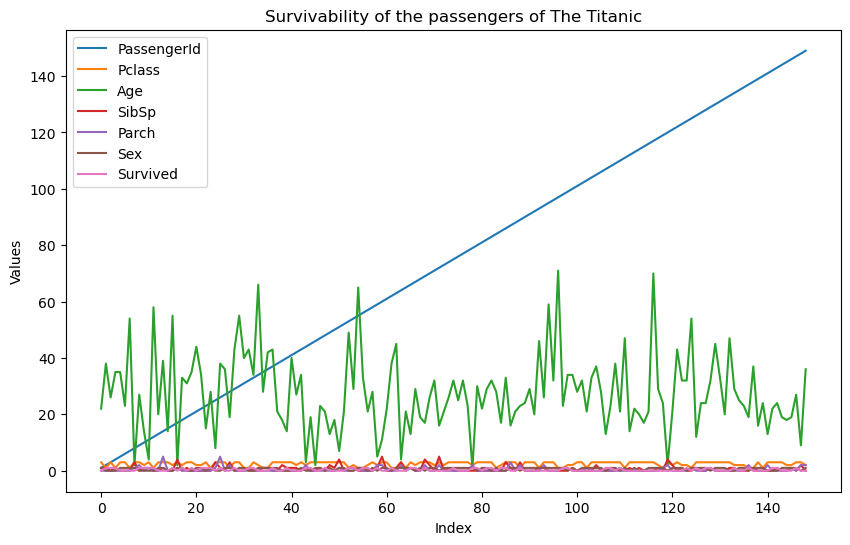

In [7]:
#Check out what we have:
DataSet.info()
plt.figure(figsize=(10, 6))
plt.plot(DataSet.index, DataSet.values)
plt.title('Survivability of the passengers of The Titanic')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(DataSet.columns, loc='best')
plt.show()

In [9]:
#Lock in the features and the the targets from the data.
features= DataSet.iloc[:,[1,5]].values
targets= DataSet.iloc[:,6].values

In [11]:
#Split out the dataset into training and testing datasets.
feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size= 0.5, random_state= 0)

In [13]:
#Scale the data for it to be fit into the machine learning model.
SD= StandardScaler()
feature_train= SD.fit_transform(feature_train)
feature_test= SD.transform(feature_test)

In [15]:
# Using the Naive Bayes classifier to train our model and make predictions.
from sklearn.naive_bayes import GaussianNB
ModelGNB= GaussianNB()
ModelGNB.fit(feature_train, target_train)

GaussianNB()

In [17]:
#Make the prediction
target_prediction = ModelGNB.predict(feature_test)

In [19]:
#Find the accuracy of our machine learning model.
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy (in %):", metrics.accuracy_score(target_test,target_prediction)*100)

Gaussian Naive Bayes model accuracy (in %): 82.66666666666667


In [21]:
#using the confusion matrix to evaluate our model.
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(target_test, target_prediction)
print(cm)

[[43  9]
 [ 4 19]]


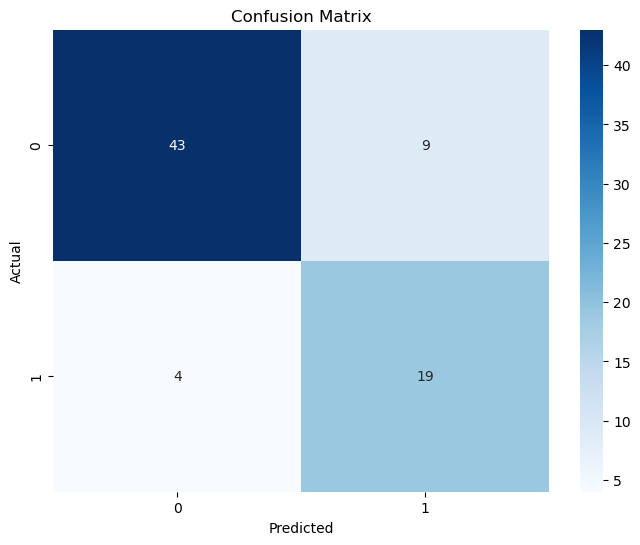

In [23]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

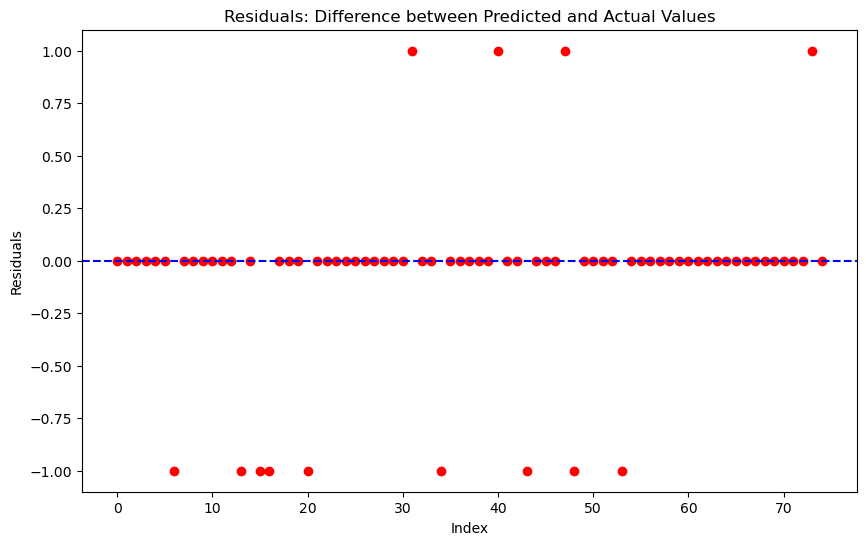

In [25]:
# Calculate the residuals
residuals = target_test - target_prediction

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o', linestyle='', color='red')
plt.title('Residuals: Difference between Predicted and Actual Values')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.axhline(y=0, color='blue', linestyle='--')
plt.show()